# Select dummy data for Alexandra

In [6]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
# path to snow-cover-mapping/
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/'

# path to study-sites/
study_sites_path = '/Users/raineyaberle/Google Drive/My Drive/Research/PhD/snow_cover_mapping/study-sites/'

# site names to include
site_names = ['Wolverine', 'Gulkana', 'LemonCreek', 'SouthCascade', 'Sperry']

,Unnamed: 0,study_site,datetime,snowlines_coords_X,snowlines_coords_Y,CRS,snowlines_elevs_m,snowlines_elevs_median_m,SCA_m2,AAR,dataset,geometry,ELA_m,year
0,0.0,Wolverine,2019-09-09T15:18:44,"[394860.0, 394855.0, 394850.0, 394850.0, 39484...","[6697645.0, 6697650.0, 6697655.0, 6697665.0, 6...",EPSG:32606,"[array(1038.35740149), array(1038.8842892), ar...",1100.334936,3.777800e+06,0.705077,Sentinel-2_TOA,"LINESTRING (394860 6697645, 394855 6697650, 39...",NaN,NaN
0,0.0,Wolverine,2020-06-03T15:28:45,"[394040.0, 394045.0, 394075.0, 394065.0, 39406...","[6695585.0, 6695590.0, 6695600.0, 6695600.0, 6...",EPSG:32606,"[array(672.19554783), array(673.61953394), arr...",720.772547,1.501290e+07,0.991657,Sentinel-2_TOA,"LINESTRING (394040 6695585, 394045 6695590, 39...",NaN,NaN
0,0.0,Wolverine,2019-08-25T15:18:35,"[393905.0, 393910.0, 393915.0, 393920.0, 39404...","[6695930.0, 6695935.0, 6695940.0, 6695945.0, 6...",EPSG:32606,"[array(932.35482144), array(932.87302994), arr...",1262.483019,2.764600e+06,0.366945,Sentinel-2_SR,"LINESTRING (393905 6695930, 393910 6695935, 39...",NaN,NaN
0,0.0,Wolverine,2019-06-29T15:28:38,"[393980.0, 394100.0, 394105.0, 394115.0, 39412...","[6695435.0, 6696515.0, 6696520.0, 6696520.0, 6...",EPSG:32606,"[array(931.02139714), array(934.50561404), arr...",930.342316,1.449900e+07,0.945657,Sentinel-2_TOA,"LINESTRING (393980 6695435, 394100 6696515, 39...",NaN,NaN
0,0.0,Wolverine,2022-06-28T15:28:56,"[394085.0, 394090.0, 394090.0, 394085.0, 39410...","[6696200.0, 6696205.0, 6696215.0, 6696220.0, 6...",EPSG:32606,"[array(776.83440908), array(778.66706404), arr...",789.905220,1.489960e+07,0.967029,Sentinel-2_TOA,"LINESTRING (394085 6696200, 394090 6696205, 39...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,Sperry,2019-06-01T12:50:47,[],[],EPSG:32612,2270.0,2270.000000,8.077849e+05,0.997901,Sentinel-2_SR,[],NaN,NaN
0,0.0,Sperry,2022-07-05T12:50:43,[],[],EPSG:32612,NaN,NaN,3.600596e+05,0.807080,Sentinel-2_TOA,[],NaN,NaN
0,0.0,Sperry,2020-06-05T12:50:40,[],[],EPSG:32612,2270.0,2270.000000,8.024870e+05,1.000000,Sentinel-2_SR,[],NaN,NaN
0,0.0,Sperry,2022-09-10T12:40:44,"[296521.9556907171, 296521.9556907171, 296516....","[5388984.738990633, 5388994.737041009, 5388999...",EPSG:32612,"[array(2348.49158279), array(2350.15708815), a...",2351.491381,9.316366e+04,0.134275,Sentinel-2_TOA,LINESTRING (296521.9556907171 5388984.73899063...,NaN,NaN


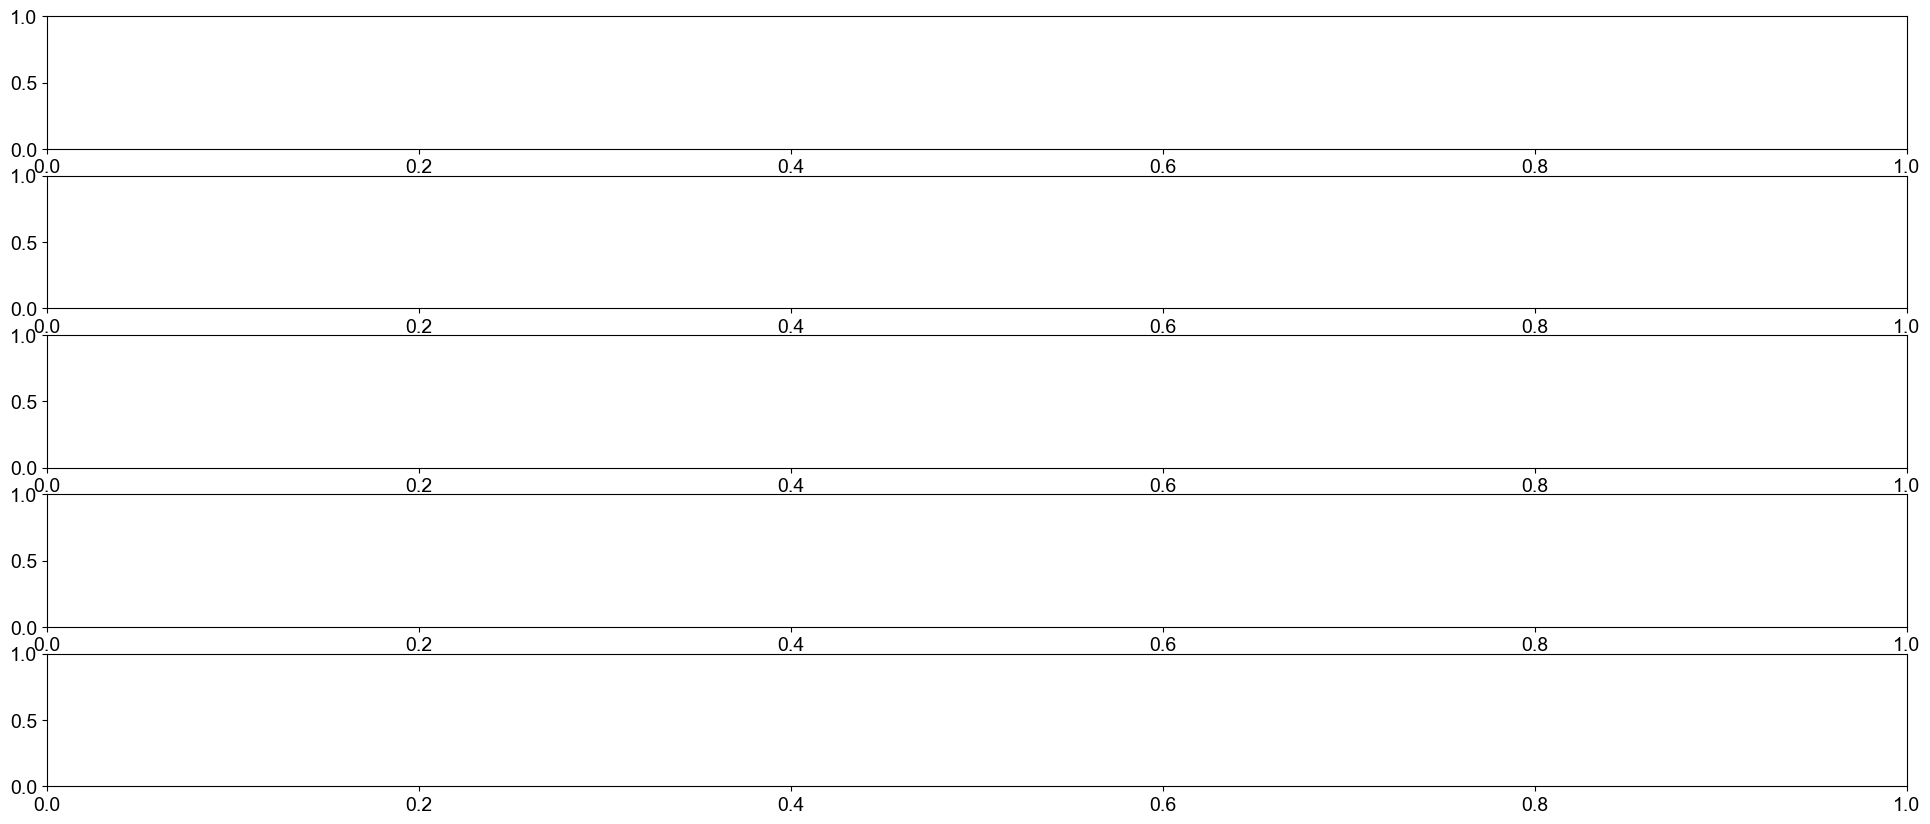

In [7]:
# set up figure
fig, ax = plt.subplots(len(site_names), 1, figsize=(24,10))
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})

# initialize dataframe
df = pd.DataFrame()

# loop through sites
for site_name in site_names:

    # load snowlines
    sl_est_path = study_sites_path + site_name +'/imagery/snowlines/' 
    sl_fns = glob.glob(sl_est_path + '*.csv')
    for sl_fn in sl_fns:
        sl_est = pd.read_csv(sl_fn)
        # concatenate to full dataframe
        df = pd.concat([df, sl_est])
    
df
    